# **Stock Price Prediction System for Sri Lanka Telecom PLC (SLTL) Using LSTM Recurrent Neural Networks**

# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
from google.colab import drive
import matplotlib.pyplot as plt

# **MOUNT GOOGLE DRIVE**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **SET PATH TO DATASET**

In [ ]:
dataset_path = '/content/drive/MyDrive/Deep Learning/SLTLHistoricalData.csv'

# **LOAD AND PREPROCESS THE DATA**

In [ ]:
data = pd.read_csv(dataset_path)
data['Date'] = pd.to_datetime(data['Date'])
prices = data['Price'].values.reshape(-1, 1)

# **CHECH LOADED DATA**

In [ ]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-02-22,96.3,96.3,96.9,95.8,51.81K,1.37%
1,2024-02-21,95.0,96.5,96.5,94.3,42.35K,-0.84%
2,2024-02-20,95.8,96.0,96.0,94.5,65.56K,0.31%
3,2024-02-19,95.5,96.9,96.9,94.0,106.54K,-1.24%
4,2024-02-16,96.7,94.1,96.9,93.0,54.83K,1.90%


# **DATA SPLITTING**

In [ ]:
# splitting the data into training(80%) and testing(20%) sets
train_size = int(len(prices) * 0.8)
train_data, test_data = prices[:train_size], prices[train_size:]

# **DATA NORMALIZATION**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# **CONSTRUCT LSTM-RNN MODEL**



In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# **RESHAPE THE TRAINING DATA**

In [ ]:
train_data = train_data.reshape((train_data.shape[0], 1, 1))

In [ ]:
train_data.shape

(928, 1, 1)

# **TRAIN THE MODEL**

In [ ]:
model.fit(train_data, train_data, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
186/186 [==============================] - 1s 6ms/step - loss: 2.6142e-06
Epoch 2/100
186/186 [==============================] - 1s 6ms/step - loss: 1.9806e-08
Epoch 3/100
186/186 [==============================] - 1s 6ms/step - loss: 1.9637e-08
Epoch 4/100
186/186 [==============================] - 1s 6ms/step - loss: 2.7002e-08
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 2.0954e-08
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 3.1076e-08
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 2.4285e-08
Epoch 8/100
186/186 [==============================] - 1s 5ms/step - loss: 3.1613e-08
Epoch 9/100
186/186 [==============================] - 1s 4ms/step - loss: 2.7658e-08
Epoch 10/100
186/186 [==============================] - 1s 4ms/step - loss: 4.1958e-08
Epoch 11/100
186/186 [==============================] - 1s 4ms/step - loss: 9.7231e-08
Epoch 12/100
186/186 [==============================

# **PREDICTION**

In [ ]:
# predict stock price values for the test set
test_data = test_data.reshape((test_data.shape[0], 1, 1))
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 0s 3ms/step


In [ ]:
# get the details about the testing dataset
test_dates = data['Date'].values[train_size:]
actual_prices = data['Price'].values[train_size:]
predicted_prices = predictions.flatten()

In [ ]:
# print the details for each date in the testing dataset
print("Date\t\t\t\tActual Price\tPredicted Price")
for i in range(len(test_dates)):
    print(f"{test_dates[i]}\t{actual_prices[i]}\t\t{predicted_prices[i]}")

Date				Actual Price	Predicted Price
2020-02-14T00:00:00.000000000	29.7		29.694765090942383
2020-02-13T00:00:00.000000000	30.7		30.69586944580078
2020-02-12T00:00:00.000000000	30.2		30.195327758789062
2020-02-11T00:00:00.000000000	30.0		29.99510383605957
2020-02-10T00:00:00.000000000	29.8		29.794878005981445
2020-02-07T00:00:00.000000000	30.0		29.99510383605957
2020-02-06T00:00:00.000000000	30.0		29.99510383605957
2020-02-05T00:00:00.000000000	29.9		29.894990921020508
2020-02-03T00:00:00.000000000	30.0		29.99510383605957
2020-01-31T00:00:00.000000000	31.0		30.996185302734375
2020-01-30T00:00:00.000000000	30.0		29.99510383605957
2020-01-29T00:00:00.000000000	29.9		29.894990921020508
2020-01-28T00:00:00.000000000	30.2		30.195327758789062
2020-01-27T00:00:00.000000000	30.6		30.595762252807617
2020-01-24T00:00:00.000000000	30.8		30.795976638793945
2020-01-23T00:00:00.000000000	31.0		30.996185302734375
2020-01-22T00:00:00.000000000	30.4		30.395545959472656
2020-01-21T00:00:00.000000000	29.9

# **CALCULATE RMSE**

In [ ]:
rmse = sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.009957517421556499


# **EXAMPLE PREDICTION**

In [ ]:
specific_date = pd.to_datetime('2024-02-19')
specific_price = data[data['Date'] == specific_date]['Price'].values
specific_price = scaler.transform(specific_price.reshape(-1, 1))
specific_price = specific_price.reshape((specific_price.shape[0], 1, 1))
predicted_specific_price = model.predict(specific_price)
predicted_specific_price = scaler.inverse_transform(predicted_specific_price)
print(f"Predicted price for {specific_date}: {predicted_specific_price[0][0]}")

1/1 [==============================] - 0s 21ms/step
Predicted price for 2024-02-19 00:00:00: 95.49903106689453


# **GRAPHICAL REPRESENTATION**

In [ ]:
# get the details about the testing dataset
test_dates = data['Date'].values[train_size:]
actual_prices = data['Price'].values[train_size:]
predicted_prices = predictions.flatten()

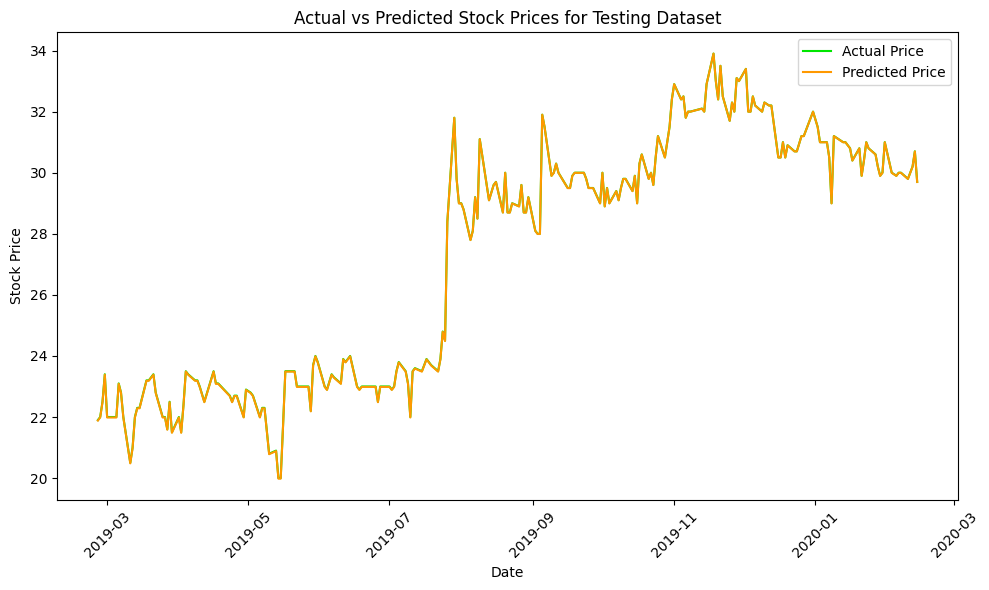

In [ ]:
# plot the actual and predicted values for the testing dataset
plt.figure(figsize=(10, 6))
plt.plot(test_dates, actual_prices, color='#00e600', label='Actual Price')
plt.plot(test_dates, predicted_prices, color='#ff9900', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Testing Dataset')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()